# Logistic Regression in Python

We will start by importing the necessary libraries.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

# Plotting the graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Import Dataset

We will use the same data which we used in the second part of the book.

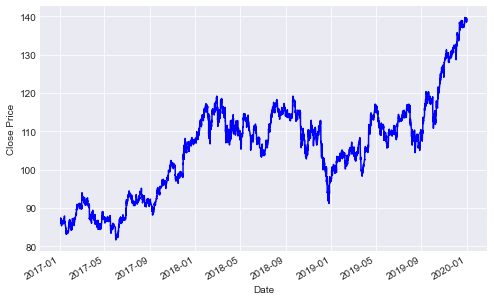

In [2]:
# The data is stored in the directory 'data_modules'
path = "../data_modules/"

# Read the data
data = pd.read_csv(path + 'JPM_2017_2019.csv', index_col=0)
data.index = pd.to_datetime(data.index)

data.close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

#### Define Target, Features and Split the Data

We have created functions for the standard tasks such as creating the target and features. This makes it easy for you to import the module and carry out the tasks without typing the code every time. You will find the utility module as well as its related information on the github page. 

Note that this is not available as a standard 'pip install'.


In [3]:
import sys
sys.path.append("..")

from data_modules.utility import get_target_features
y, X = get_target_features(data)

split = int(0.8*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], \
                                   y[:split], y[split:]

#### Feature Scaling

Another important step in data preprocessing is to standardise the dataset. This process makes the mean of all the input features equal to zero and also converts their variance to 1. This ensures that there is no bias while training the model due to the different scales of all input features. If this is not done the neural network might get confused, and give a higher weight to those features which have a higher average value than others.

We implement this step by importing the StandardScaler method from the sklearn.preprocessing library. We instantiate the variable sc with the StandardScaler() function. After which we use the fittransform function for implementing these changes on the Xtrain and Xtest datasets. The ytrain and y_test sets need not be standardised. 

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_original = X_test.copy()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Instantiate the Logistic Regression

We will instantiate the logistic regression in Python using ‘LogisticRegression’ function and fit the model on the training dataset using ‘fit’ function.

In [5]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

#### Examine the Coefficients


In [6]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,pct_change,[0.015386536081786934]
1,pct_change2,[-0.08026259453839449]
2,pct_change5,[0.024335207683013584]
3,rsi,[0.0052866122780786074]
4,adx,[0.013464920611383466]
5,corr,[-0.001639525259172929]
6,volatility,[0.016321785785599726]


#### Calculate Class Probabilities

We will calculate the probabilities of the class for the test dataset using ‘predict_proba’ function.

In [7]:
probability = model.predict_proba(X_test)
print(probability)

[[0.50948029 0.49051971]
 [0.51218059 0.48781941]
 [0.51603258 0.48396742]
 ...
 [0.51860144 0.48139856]
 [0.52032489 0.47967511]
 [0.52745957 0.47254043]]


#### Predict Class Labels

Next, we will predict the class labels using predict function for the test dataset.

If you print ‘predicted’ variable, you will observe that the classifier is predicting 1, when the probability in the second column of variable ‘probability’ is greater than 0.5. When the probability in the second column is less than 0.5, then the classifier is predicting -1.

In [8]:
predicted = model.predict(X_test)

#### Evaluate the Model

We will by printing the confusion matrix, as well as the classification report and the score.

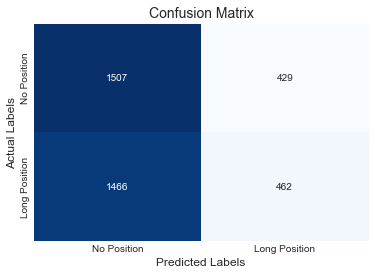

              precision    recall  f1-score   support

           0       0.51      0.78      0.61      1936
           1       0.52      0.24      0.33      1928

    accuracy                           0.51      3864
   macro avg       0.51      0.51      0.47      3864
weighted avg       0.51      0.51      0.47      3864



In [9]:
from data_modules.utility import get_metrics
get_metrics(y_test, predicted)

#### Create Trading Strategy Using the Model

We will predict the signal on the test dataset. We will calculate the cumulative strategy return based on the signal predicted by the model in the test dataset. We will also plot the cumulative returns.

In [10]:
# Calculate the percentage change
strategy_data = X_test_original[['pct_change']].copy()

# Predict the signals
strategy_data['predicted_signal'] = model.predict(X_test)

# Calculate the strategy returns
strategy_data['strategy_returns'] = \
    strategy_data['predicted_signal'].shift(1) * \
    strategy_data['pct_change']

# Drop the missing values
strategy_data.dropna(inplace=True)

strategy_data.head()

,pct_change,predicted_signal,strategy_returns
2019-05-28 12:15:00+00:00,0.000732,0,0.0
2019-05-28 12:30:00+00:00,-0.000366,0,-0.0
2019-05-28 12:45:00+00:00,0.000366,0,0.0
2019-05-28 13:00:00+00:00,0.000091,0,0.0
2019-05-28 13:15:00+00:00,-0.000091,0,-0.0


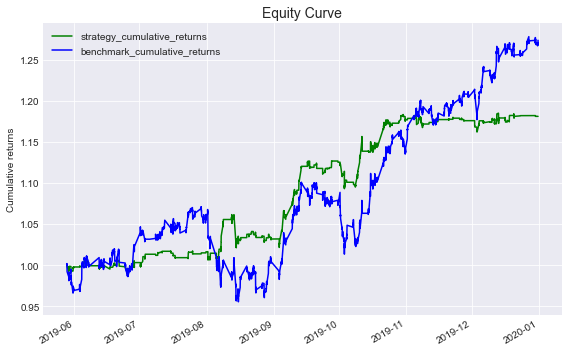

The maximum drawdown is -3.80%.


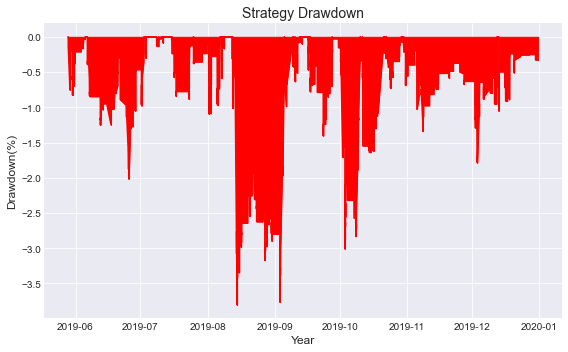

The Sharpe ratio is 2.75.


In [11]:
from data_modules.utility import get_performance
get_performance(strategy_data)

It can be observed that the Logistic Regression model in Python generates decent returns. Now it’s your turn to play with the code by changing parameters and create a trading strategy based on it.